<a href="https://colab.research.google.com/github/girvarshangari/OCR_Computer_Vision/blob/main/Girvar_M6_NB_MiniProject_1_Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science

##  A program by IISc and TalentSprint

### Mini Project 1: Market Basket analysis

## Learning Objectives

At the end of the experiment, you will be able to:

* extract summary level insight from a given dataset

* Integrate the data and identify the underlying pattern or structure

* understand the fundamentals of market basket analysis

* construct "rules" that provide concrete recommendations for businesses

## Dataset

The dataset chosen for this mini project is **Instacart Dataset**. The dataset is anonymized and contains a sample of over 3 million grocery orders from more than 200,000 Instacart users. For each user, there are orders between 4 and 100, with the sequence of products purchased in each order. The dataset also includes the products in each order, the time of day and day of week of each order, the name and aisle/department of each product, which are stored across various files.

## Problem Statement


Extract association rules and find groups of frequently purchased items from a large-scale grocery orders dataset.

## Grading = 10 Points

#### Import required packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

## **Stage 1**: Data Wrangling

We have five different files:

    - orders.csv
    - order_products__train.csv
    - products.csv
    - aisles.csv
    - departments.csv

These files contain the neccesary data to solve the problem. Load all the files correctly, after observing the header level details, data records etc

**Hint:** Use `read_csv` from pandas

In [3]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/CDS/Datasets/Instacart.zip
!unzip -qq Instacart.zip

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Load the data

Load all the given datasets

In [4]:
#-------------------------------#
#-CREATING DATASETS-------------#
#-------------------------------#

aisles = pd.read_csv('/content/Instacart/aisles.csv')
departments = pd.read_csv('/content/Instacart/departments.csv')
order_products__train = pd.read_csv('/content/Instacart/order_products__train.csv')
orders = pd.read_csv('/content/Instacart/orders.csv')
products = pd.read_csv('/content/Instacart/products.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Data Integration (1 point)

As the required data is present in different files, we need to integrate all the five to make single dataframe/dataset. For that purpose, use the unique identifier provided in all the dataframes so that it can be used to map the data in different files correctly.

**Example:** `product_id` is available in both `products` dataframe and `order_products__train` dataframe, we can merge these two into a single dataframe based on `product_id`

**Hint:** [pd.merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)

In [5]:
#-----------------------------------#
#-MERGING BOTH DATASETS-------------#
#-----------------------------------#
order_products__train = pd.merge(order_products__train, products, on='product_id', how='left')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
order_products__train

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1,49302,1,1,Bulgarian Yogurt,120,16
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16
2,1,10246,3,0,Organic Celery Hearts,83,4
3,1,49683,4,0,Cucumber Kirby,83,4
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15
...,...,...,...,...,...,...,...
1384612,3421063,14233,3,1,Natural Artesian Water,115,7
1384613,3421063,35548,4,1,Twice Baked Potatoes,13,20
1384614,3421070,35951,1,1,Organic Unsweetened Almond Milk,91,16
1384615,3421070,16953,2,1,Creamy Peanut Butter,88,13


### Understanding relationships and new insights from the data (3 points)

1.  How many times was each product ordered?

    **Hint:** group orders by product
    

2.  Find the number of orders per department and visualize using an appropriate plot


3.  On which day of the week do customers tend to buy more groceries? Which are the peak hours
of shopping?

  * Find the frequency of orders on week days using an appropriate plot
  * Find the frequency of orders during hours of the day using an appropriate plot?
  

4. Find the ratio of Re-ordered and Not Re-ordered products and visualize it

5. Plot the heatmap of Re-order ratio of the Day of week vs Hour of day

In [7]:
#-------------------------------------------------------------#
#-FREQUENCY OF HOW MANY TIME EACH PRODUCT ORDERED-------------#
#-------------------------------------------------------------#

product_orders_df = order_products__train.groupby('product_id')['order_id'].nunique()
product_orders_df = product_orders_df.sort_values(ascending=False)
print(product_orders_df.head())
#product_orders_df[product_orders_df.index==1]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


product_id
24852    18726
13176    15480
21137    10894
21903     9784
47626     8135
Name: order_id, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


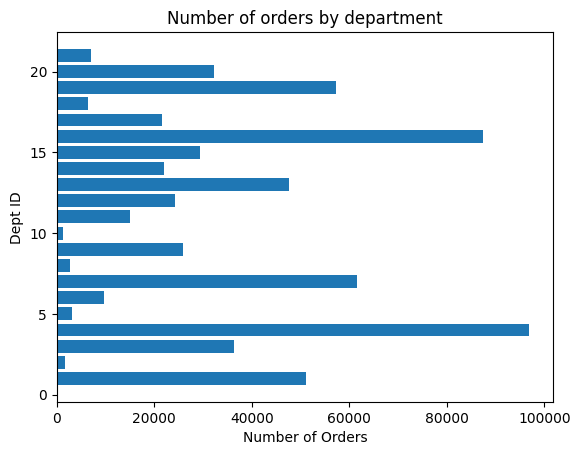

In [8]:
#------------------------------------------#
#-NO. OF ORDERS PER DEPARTMENT-------------#
#------------------------------------------#

dept_orders_df = order_products__train.groupby('department_id',as_index=False)['order_id'].nunique()
#dept_orders_df.rename('count', inplace=True)
#dept_orders_df = pd.DataFrame(dept_orders_df.sort_values(ascending=False),index=None)
#dept_orders_df = dept_orders_df.from_dict(dept_orders_df, orient='index', columns=None)
#dept_orders_df = dept_orders_df.to_frame(name='count')
dept_orders_df.reset_index(drop=True)
plt.barh(dept_orders_df.department_id, dept_orders_df.order_id)
plt.xlabel('Number of Orders')
plt.ylabel('Dept ID')
plt.title('Number of orders by department')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


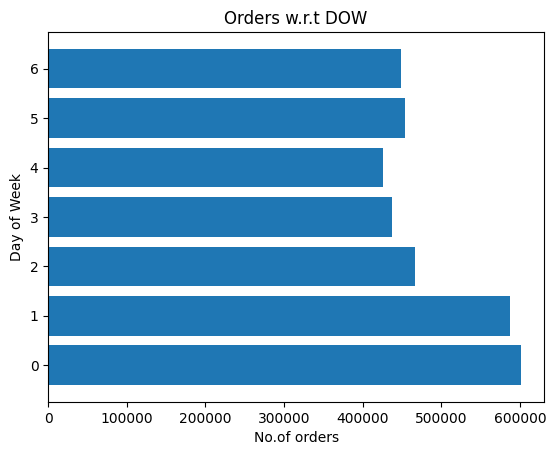

In [9]:
#-----------------------------------------------------#
#-FREQUENCY OF ORDERS PER DAY OF THE WEEK-------------#
#-----------------------------------------------------#

dow_max = orders.groupby('order_dow')['order_id'].nunique()
#dept_orders_df.rename('count', inplace=True)
#dept_orders_df = pd.DataFrame(dept_orders_df.sort_values(ascending=False),index=None)
#dept_orders_df = dept_orders_df.from_dict(dept_orders_df, orient='index', columns=None)
#dept_orders_df = dept_orders_df.to_frame(name='count')
#dow_max.reset_index(drop=True)
dow_max

# Create a bar chart of the number of rows for each ID
plt.barh(dow_max.index, dow_max.values)
plt.xlabel('No.of orders')
plt.ylabel('Day of Week')
plt.title('Orders w.r.t DOW')
plt.show()
#plt.barh(dept_orders_df.department_id, dept_orders_df.order_id)
#plt.xlabel('Number of Orders')
#plt.ylabel('Dept ID')
#plt.title('Number of orders by department')
#plt.show()
#dow_max.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


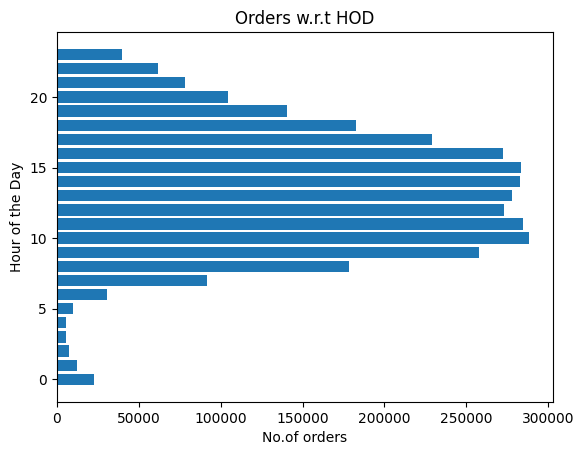

In [10]:
#----------------------------------------------#
#-NO. OF ORDERS IN DAY OF THE HOUR-------------#
#----------------------------------------------#

order_hour_of_day_max = orders.groupby('order_hour_of_day')['order_id'].nunique()
#dept_orders_df.rename('count', inplace=True)
#dept_orders_df = pd.DataFrame(dept_orders_df.sort_values(ascending=False),index=None)
#dept_orders_df = dept_orders_df.from_dict(dept_orders_df, orient='index', columns=None)
#dept_orders_df = dept_orders_df.to_frame(name='count')
#dow_max.reset_index(drop=True)
order_hour_of_day_max

# Create a bar chart of the number of rows for each ID
plt.barh(order_hour_of_day_max.index, order_hour_of_day_max.values)
plt.xlabel('No.of orders')
plt.ylabel('Hour of the Day')
plt.title('Orders w.r.t HOD')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


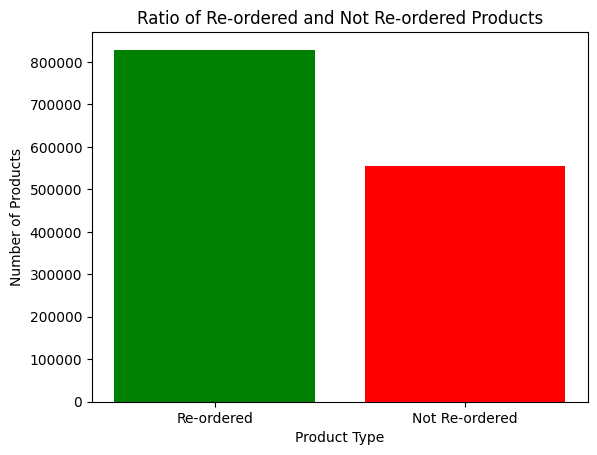

In [11]:
#------------------------------------------------------------#
#-VU=ISUALIZATION OF REORDERED AND NON-REORDERED-------------#
#------------------------------------------------------------#
n_reordered_products = len(order_products__train[order_products__train['reordered'] == 1])
n_not_reordered_products = len(order_products__train[order_products__train['reordered'] == 0])
ratio_reordered_products = n_reordered_products / (n_reordered_products + n_not_reordered_products)
plt.bar(['Re-ordered', 'Not Re-ordered'],[n_reordered_products, n_not_reordered_products],color=['green', 'red'],)
plt.xlabel('Product Type')
plt.ylabel('Number of Products')
plt.title('Ratio of Re-ordered and Not Re-ordered Products')
plt.show()

In [12]:
ratio_reordered_products

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.5985944127509629

In [13]:
data_reordered = pd.merge(order_products__train, orders, on='order_id', how='left')
data_reordered

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,Bulgarian Yogurt,120,16,112108,train,4,4,10,9.0
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,112108,train,4,4,10,9.0
2,1,10246,3,0,Organic Celery Hearts,83,4,112108,train,4,4,10,9.0
3,1,49683,4,0,Cucumber Kirby,83,4,112108,train,4,4,10,9.0
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,112108,train,4,4,10,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384612,3421063,14233,3,1,Natural Artesian Water,115,7,169679,train,30,0,10,4.0
1384613,3421063,35548,4,1,Twice Baked Potatoes,13,20,169679,train,30,0,10,4.0
1384614,3421070,35951,1,1,Organic Unsweetened Almond Milk,91,16,139822,train,15,6,10,8.0
1384615,3421070,16953,2,1,Creamy Peanut Butter,88,13,139822,train,15,6,10,8.0


In [29]:
not_reordered=data_reordered[data_reordered['reordered']==0]
reordered=data_reordered[data_reordered['reordered']==1]
d1=pd.DataFrame(reordered.groupby(by=['order_dow','order_hour_of_day']).agg({'product_id':'nunique'}))
d1.columns=['reordered_counts']
d1.reset_index(inplace=True)
d2=pd.DataFrame(not_reordered.groupby(by=['order_dow','order_hour_of_day']).agg({'product_id':'nunique'}))
d2.columns=['not_reordered_counts']
d2.reset_index(inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
df=pd.concat([d1,d2],axis=1)
df['reorder_ratio']=round(df['reordered_counts']/df['not_reordered_counts'],2)
df=df.iloc[:,[0,1,-1]]
df=df.pivot_table(index='order_hour_of_day',columns='order_dow',values='reorder_ratio',aggfunc='max') #use any aggfunc as there is a single value so could be mean,min or max
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


order_dow,0,1,2,3,4,5,6
order_hour_of_day,,,,,,,
0,1.12,1.38,1.21,1.30,1.00,0.92,1.04
1,1.22,1.11,1.35,0.97,1.21,1.22,1.39
2,1.24,0.99,1.36,1.49,1.06,0.99,1.58
3,1.08,1.90,1.22,1.18,1.41,1.21,1.47
4,1.39,1.57,1.60,0.85,1.52,1.55,1.48
5,1.37,1.33,1.55,1.61,1.79,1.32,1.39
6,1.45,1.55,1.43,1.70,1.77,1.28,1.38
7,1.39,1.39,1.30,1.25,1.28,1.29,1.34
8,1.22,1.21,1.19,1.26,1.18,1.20,1.17


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


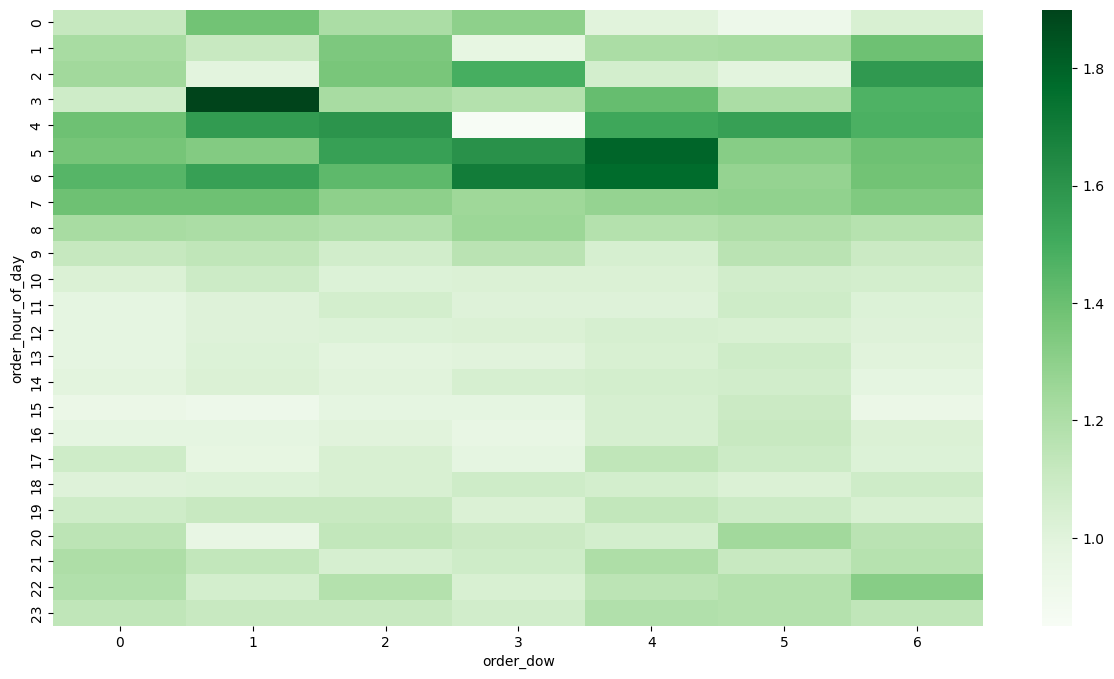

In [31]:
plt.figure(figsize=(15,8));
sns.heatmap(df,cmap='Greens');

## **Stage 2:** Create a basket (4 points)

As the dataset contains huge amount of data, let us take a subset of the data to extract the association rules from it.

**Assumption:** Segment the data by considering the 100 most frequent ordered items. Please note it is just an assumption. You can consider 'n' frequent order items as per your choice.

**Hint:**

- Drop the unwanted columns

- Find the frequencies of orders based on the products and  consider the 100 most frequent order items.

    **Hint:** Count the frequencies of orders for each product_id using `groupby()` and `count()` respectively

- Extract the records of 100 most frequent items (which are extracted in previous step) from combined dataframe.

- Create a Pivot table with `order_id` as index and `product_name` as columns and `reorder` as values.

    - set the `order_id` as index using set_index()
    - fill all the nan values with 0

- After performing the above step, there are a lot of zeros in the data, make sure that any positive values are converted to a 1 and anything less than 0 is set to 0.


In [17]:
data_reordered

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,Bulgarian Yogurt,120,16,112108,train,4,4,10,9.0
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,112108,train,4,4,10,9.0
2,1,10246,3,0,Organic Celery Hearts,83,4,112108,train,4,4,10,9.0
3,1,49683,4,0,Cucumber Kirby,83,4,112108,train,4,4,10,9.0
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,112108,train,4,4,10,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384612,3421063,14233,3,1,Natural Artesian Water,115,7,169679,train,30,0,10,4.0
1384613,3421063,35548,4,1,Twice Baked Potatoes,13,20,169679,train,30,0,10,4.0
1384614,3421070,35951,1,1,Organic Unsweetened Almond Milk,91,16,139822,train,15,6,10,8.0
1384615,3421070,16953,2,1,Creamy Peanut Butter,88,13,139822,train,15,6,10,8.0


In [18]:
df_grouped = data_reordered.groupby('product_id')['order_id'].nunique()
df_grouped = df_grouped.sort_values(ascending=False)
df_top_100 = df_grouped.head(100)
df_top_100

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


product_id
24852    18726
13176    15480
21137    10894
21903     9784
47626     8135
         ...  
8193      1418
9387      1379
37687     1362
20995     1361
34243     1351
Name: order_id, Length: 100, dtype: int64

In [19]:
df_top_100 = pd.DataFrame(df_top_100)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
products = list(df_top_100.index)
products

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[24852,
 13176,
 21137,
 21903,
 47626,
 47766,
 47209,
 16797,
 26209,
 27966,
 39275,
 27845,
 30391,
 45007,
 22935,
 24964,
 4920,
 46979,
 40706,
 8518,
 4605,
 42265,
 45066,
 31717,
 5876,
 44632,
 43352,
 28204,
 5450,
 8424,
 21616,
 24184,
 19057,
 30489,
 26604,
 37646,
 27104,
 49235,
 28985,
 44359,
 48679,
 41950,
 21938,
 17794,
 43961,
 27086,
 49683,
 34126,
 10749,
 39877,
 37067,
 9076,
 5077,
 12341,
 8277,
 34969,
 19660,
 35951,
 24838,
 25890,
 31506,
 46667,
 22035,
 8174,
 35221,
 29487,
 34358,
 28842,
 20114,
 11520,
 22825,
 39928,
 15290,
 33198,
 27344,
 18465,
 27521,
 16759,
 33731,
 9839,
 38739,
 27156,
 23909,
 5785,
 46906,
 196,
 11777,
 28199,
 33000,
 44142,
 47144,
 40604,
 5025,
 42736,
 21709,
 8193,
 9387,
 37687,
 20995,
 34243]

In [21]:
df_subset = data_reordered[data_reordered['product_id'].isin(products)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
pivot_table = df_subset.pivot_table(
    index='order_id',
    columns='product_name',
    values='reordered',
    aggfunc='count',
    fill_value=0
)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
df_subset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3,1,49683,4,0,Cucumber Kirby,83,4,112108,train,4,4,10,9.0
5,1,13176,6,0,Bag of Organic Bananas,24,4,112108,train,4,4,10,9.0
6,1,47209,7,0,Organic Hass Avocado,24,4,112108,train,4,4,10,9.0
7,1,22035,8,1,Organic Whole String Cheese,21,16,112108,train,4,4,10,9.0
9,36,19660,2,1,Spring Water,115,7,79431,train,23,6,18,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384583,3420998,8174,27,0,Organic Navel Orange,24,4,123299,train,25,6,18,30.0
1384596,3421049,34243,6,0,Organic Baby Broccoli,83,4,189544,train,4,1,9,3.0
1384599,3421056,21709,3,1,Sparkling Lemon Water,115,7,83898,train,13,2,20,11.0
1384610,3421063,49235,1,1,Organic Half & Half,53,16,169679,train,30,0,10,4.0


In [24]:
pivot_table

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


product_name,100% Whole Wheat Bread,2% Reduced Fat Milk,Apple Honeycrisp Organic,Asparagus,Bag of Organic Bananas,Banana,Blueberries,Boneless Skinless Chicken Breasts,Broccoli Crown,Bunched Cilantro,...,Sparkling Lemon Water,Sparkling Natural Mineral Water,Sparkling Water Grapefruit,Spring Water,Strawberries,Uncured Genoa Salami,Unsalted Butter,Unsweetened Almondmilk,Unsweetened Original Almond Breeze Almond Milk,Yellow Onions
order_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
38,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3420998,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3421049,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3421056,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## **Stage 3:** Apply Apriori algorithm (2 points)

- As the dataset contains huge amount of data, let us take a subset of the data to extract the association rules from it.

  **Assumption:** Segment the basket by considering 100000 records. Please note its just an assumption, you can consider 'n'  records as per your choice.

  **Hint:** [apriori](http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.frequent_patterns/)

- Find the association rules and make a dataframe

In [32]:

frequent_itemsets=apriori(df=pivot_table,min_support=0.02,use_colnames=True)
frequent_itemsets

# Print the association rules
frequent_itemsets



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.024486,(100% Whole Wheat Bread)
1,0.023996,(Apple Honeycrisp Organic)
2,0.041215,(Asparagus)
3,0.164944,(Bag of Organic Bananas)
4,0.199531,(Banana)
...,...,...
75,0.022994,"(Large Lemon, Banana)"
76,0.023612,"(Banana, Organic Avocado)"
77,0.021311,"(Banana, Organic Baby Spinach)"
78,0.023165,"(Organic Strawberries, Banana)"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
